Name: Milagros Contreras Elizalde

e-mail: -- milagros.contreras8430@alumnos.udg.mx --

# RANDOM WALK ACTIVITY 1 

In mathematics, a random walk, sometimes known as a drunkard's walk, is a stochastic process that describes a path that consists of a succession of random steps on some mathematical space.

An elementary example of a random walk is the random walk on the integer number line  𝑍
  which starts at  0
 , and at each step moves  +1
  or  −1
  with equal probability.

Instructions:
* Select rotations from a Cauchy distribution (scipy).
* Implement usign Vec2d class.
* Keep trajectory in a numpy array
* Visualize trajectory using plotly - 2D projection

# MODULES

In [1]:
import numpy as np
from scipy.stats import cauchy
import plotly.express as px

Defining the Vec2d class
A vector in 2D space.

In [2]:
class Vec2d:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vec2d(self.x + other.x, self.y + other.y)

    def __mul__(self, scalar):
        return Vec2d(self.x * scalar, self.y * scalar)

    def __repr__(self):
        return f"Vec2d({self.x}, {self.y})"

Generate the Cauchy distribution and initializing the trajectory

The probability density function for cauchy is

$$f(x) = 1/ \pi (1+x^2)$$

for a real number $x$.

The above probability density is defined in a “standardized” form. The loc and scale parameters are used to shift or scale the distribution.

In [3]:
n_steps = 1000
rotations = cauchy.rvs(loc=0, scale=0.7, size=n_steps)

trajectory = np.zeros((n_steps, 2)) # Initialize the trajectory array
trajectory[0] = [0, 0] #set the initial position of the random walk

Implementing the correlated random walk using the Vec2d class
Let say $X(t)$ define a path starting at position $X(0) = X_0$ . A random walk is modeled by the following expression
$$X(t + τ) = X (t) + Φ( τ)$$
where $Φ$ is the random variable describing the probability law for taking the next step and $τ$ is the time interval between subsequent steps.

The line "new_pos = prev_pos + Vec2d(np.cos(rotation), np.sin(rotation))" corresponds to the expression $X(t + τ) = X(t) + Φ(τ)$.

Where


*   prev_pos represents $X(t)$, the current position at time $t$.
*   Vec2d(np.cos(rotation), np.sin(rotation)) represents $Φ(τ)$, the random variable describing the next step. The rotation variable is drawn from the Cauchy distribution, and np.cos(rotation) and np.sin(rotation) are used to compute the x and y components of the next step, respectively.
*    The $+$ operator is overloaded in the Vec2d class to perform vector addition, so prev_pos + Vec2d(np.cos(rotation), np.sin(rotation)) computes the new position $X(t + τ)$ by adding the current position $X(t)$ and the random step $Φ(τ)$


In [4]:
for i in range(1, n_steps):
    rotation = rotations[i-1]
    prev_pos = Vec2d(*trajectory[i-1])
    new_pos = prev_pos + Vec2d(np.cos(rotation), np.sin(rotation))
    trajectory[i] = [new_pos.x, new_pos.y]

Visualizing the trajectory using Plotly

In [6]:
fig = px.line(x=trajectory[:, 0], y=trajectory[:, 1])
fig.update_layout(title="Correlated Random Walk Trajectory", xaxis_title="X", yaxis_title="Y")
fig.show()

Referencias



*   Wikipedia contributors. (2024, August 27). Random walk. Wikipedia. https://en.wikipedia.org/wiki/Random_walk
*   Scipy.Stats.cauchy — SciPy V1.14.1 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html
*   colaboradores de Wikipedia. (2024, January 21). Camino aleatorio. Wikipedia, La Enciclopedia Libre. https://es.wikipedia.org/wiki/Camino_aleatorio



## Activity 2: Lévy distribution - N different curves

In probability theory and statistics, the Lévy distribution, named after Paul Lévy, is a continuous probability distribution for a non-negative random variable. In spectroscopy, this distribution, with frequency as the dependent variable, is known as a van der Waals profile. It is a special case of the inverse-gamma distribution. It is a stable distribution.

Instructions:
*  Plot at least the 4 different curves shown in the figure using plotly.
*  Each one of the curves corresponds to a different alpha value.
*  Consider the following parameters: m = 3.0, beta = 0.

Modules

In [10]:
import numpy as np
import plotly.graph_objs as go
from scipy.stats import levy_stable

## Lévy alpha-stable distribution


**Function  φ(t, α, β, c, μ):**

$$ \phi(t, \alpha, \beta, c, \mu) = e^{i t \mu - |c t|^\alpha \left(1 - i \beta \, \text{sgn}(t) \Phi(\alpha, t)\right)} $$

Where:
$$
\Phi(\alpha, t) =
\begin{cases}
\tan\left(\frac{\pi}{2 \alpha}\right) & \text{si } \alpha \neq 1 \\
-\frac{2 \pi}{\ln |t|} & \text{si } \alpha = 1
\end{cases} $$
**Fourier Transform f(x):**

$$ f(x) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \phi(t) e^{-i x t} \, dt $$

1. **`α` (Stability Parameter):**
   - Determines the curves behavior.

2. **`β` (Skewness Parameter):**
   - In this case $\beta = 0$, therefore it is symmetrical.
  
3. **`c` (Scale Parameter ):**
   - Adjusts the distribution.

4. **`m` or μ (Location Parameter):**
   - change the distribution .


In [11]:
# Common parameters
m = 3.0  # Location
b = 0.0
c = 1.0  # in ecuation is c

# Values of alpha
alpha_list = [0.8, 1, 1.3, 1.9]

In [13]:
# values of x
x = np.linspace(-2, 8,500)

# list empty for Plotly
line_p = []

# Generate and plot the values of alpha
for alpha in alpha_list:
    y = levy_stable.pdf(x, alpha, b, loc=m, scale=c)
    name_value = go.Scatter(x=x, y=y, mode='lines', name=f'Lévy alpha={alpha}')
    line_p.append(name_value)

layout = go.Layout(title=dict(text='Lévy Distribution - N different curves' ))
levy_plot = go.Figure(data=line_p, layout=layout)
levy_plot.show()

**Note:** The curves vary depending on the value of alpha but are within the location m=3


Teory based in: https://en.wikipedia.org/wiki/Stable_distribution

## Activity 3: Lévy distribution - Histograma + Curve

Instructions:
* From a set of random values drawn from a Lévy stable distribution, obtain its histogramand compare it to the corresponding PDF curve.
* Visualize using matplotlib.

Modules

In [14]:
import numpy as np
from scipy.stats import levy_stable
import matplotlib.pyplot as plt

The parameters of the Lévy stable distribution: alpha = 1.2 and beta = 0.

In [15]:
# parameters
alpha, beta = 1.2, 0
# Range of x values
x = np.linspace(-6, 6, 1000)

Generate random values from the Lévy stable distribution with `levy_stable.rvs` you can consult the [scipy.stats.levy_stable](https://docs.scipy.org/doc/scipy/reference/stats.html)

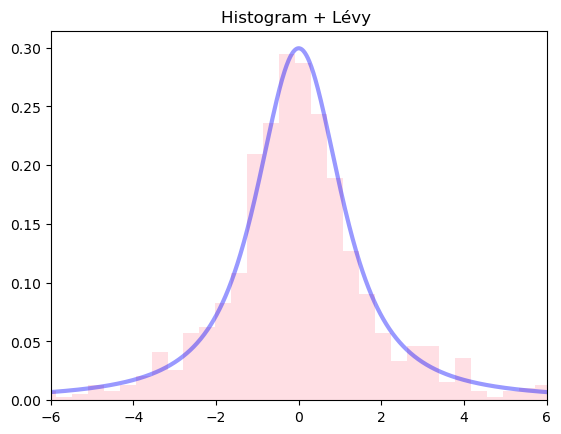

In [16]:
rand_v = levy_stable.rvs(alpha, beta, size=1000)

# Plot
plt.plot(x, levy_stable.pdf(x, alpha, beta), 'b-', lw=3, alpha=0.4, label='Lévy')

# Plot the histogram
plt.hist(rand_v, density=True, bins='auto', histtype='bar', alpha=0.5, label='Histogram', color='pink')

# Set the limits
plt.xlim([-6, 6])


# Display the plot
plt.title(f'Histogram + Lévy ')
plt.show()

## Activity 4: Lévy flight - Vec2d - 1 Trajecotry

Instructions:
* Generate a Lévy flight trajectory.
* Implement usign Vec2d class.
* Keep the trajectory in a pandas Data Frame.
* Visualize trajectory using plotly - 3D projection